# Simple Linear Regression

In this notebook are some exercises to gain more experience with the material presented in the Simple Linear Regression lecture. You'll get some practice fitting models, and gain a stronger theoretical understanding of the technique as well. We'll also introduce some new important concepts that weren't explicitly covered in the lecture.

In [6]:
# import the packages we'll use
## For data handling
import pandas as pd
import numpy as np
from numpy import meshgrid

## For plotting
import matplotlib.pyplot as plt
import seaborn as sns

## This sets the plot style
## to have a grid on a white background
sns.set_style("whitegrid")

### Theoretical Questions

##### 1. Mixing up $X$ and $y$

Explain how simple linear regression works. Suppose we go out and collect some data, $X$ a single feature and $y$ the target variable. If the true relationship between $y$ and $X$ is $y = X + \epsilon$, what should the output of SLR be?  Now suppose we mistakenly misclassify $X$ as the target and $y$ as the feature and regress $X$ on $y$. What would you expect to happen to the estimate $\hat{\beta_1}$? What about in the limit as the variance of $\epsilon$ goes to $\infty$?

#### Answer

Regressing $y$ on $X$ we would expect an estimate of $\hat{\beta_0} \approx 0$ and $\hat{\beta_1} \approx 1$, assuming that the data are well behaved and you have a large enough sample.

Recall that when we regress $y$ on $X$ the formula for $\hat{\beta_1}$ is 
$$
\hat{\beta_1} = \frac{\text{Cov}(X,y)}{\sigma_X^2}.
$$
So if we regress $X$ on $y$ by mistake we have:
$$
\hat{\beta_1} = \frac{\text{Cov}(X,y)}{\sigma_y^2},
$$
but $y = \beta_0 + \beta_1 X + \epsilon$ and so $\text{Var}(y) = \beta_1^2 \text{Var}(X) + \text{Var}(\epsilon) = \beta_1^2 \sigma^2 X + \sigma^2 > \sigma^2 X$, for large enough $\sigma^2$.

Thus in the limit as $\sigma^2 \rightarrow \infty$ it follows that. $\hat{\beta_1} \rightarrow 0$.

##### 2. An Introduction to Maximum Likelihood Estimation (MLE)

In this question we'll introduce the concept of maximum likelihood estimation to derive the formula for $\hat{\beta_1}$. Assume the standard SLR assumptions. Let $y$ denote the target variable, let $X$ denote the feature variable and suppose the true relationship between $y$ and $X$ is $y = \beta_0 + \beta_1 X + \epsilon$. As usual assume there are $n$ observations.

For now let's look at the first observation, $(X_1,y_1)$. The likelihood of observing $y_1$ given $X_1$ is
$$
f\left(y_1|X_1;\beta_0,\beta_1\right) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{1}{2}\frac{\left(y_1 - \left(\beta_0 + \beta_1 X_1\right)\right)^2}{\sigma^2}\right)
$$
because we have assumed that $\epsilon\sim N(0,\sigma^2)$. You can think of this as the probability of observing $y_1$ given $x_1$ and our model parameters. The goal of maximum likelihood estimation is to choose the parameters, in this case $\beta_0$ and $\beta_1$, that maximize the likelihood. 

Because we've assumed independence of our observations the likelihood of observing $y$ given $X$ is:
$$
f\left(y|X;\beta_0,\beta_1\right) = \prod_{i=1}^n f\left(y_i|X_i;\beta_0,\beta_1\right) = \prod_{i=1}^n \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{1}{2}\frac{\left(y_i - \left(\beta_0 + \beta_1 X_i\right)\right)^2}{\sigma^2}\right)
$$

Take the partial derivatives of $f\left(y|X;\beta_0,\beta_1\right)$ with respect to $\beta_0$ and $\beta_1$, then set these equal to $0$ and solve to find the maximum likelihood estimator for simple linear regression.

Hint: Try maximizing $\log\left(f\left(y|X;\beta_0,\beta_1\right)\right)$ instead, because $\log$ is a strictly increasing function this is the same as maximizing $f\left(y|X;\beta_0,\beta_1\right)$.

#### ANSWER

Ignoring the constant in front we have that 
$$
\log \left(f(y_i|X)\right) = -\frac{1}{2}\frac{(y_i - (\beta_0 + \beta_1X_i))^2}{\sigma^2}.
$$
So $\partial_{\beta_0} \log \left(f(y_i|X)\right) = (y_i - (\beta_0 + \beta_1 X_i))/\sigma^2$, and $\partial_{\beta_1} \log \left(f(y_i|X)\right) = X_i(y_i - (\beta_0 + \beta_1 X_i))/\sigma^2$




This implies that
$$
\log \left(f(y|X)\right) = \sum_{i=1}^n -\frac{1}{2} \frac{(y_i - (\beta_0 + \beta_1X_i))^2}{\sigma^2},
$$
where again I've ignored the constant, and so
$$
\partial_{\beta_0} \log \left( f(y|X) \right) = \sum_{i=1}^n \partial_{\beta_0} \left(f(y_i|X)\right) = \sum_{i=1}^n (y_i - (\beta_0 + \beta_1 X_i))/\sigma^2 = (n \overline{y} - n\beta_0 + n\beta_1 \overline(X))/sigma^2.
$$
Setting this equal to $0$ and solving for $\beta_0$ we find that the MLE is given by:
$$
\hat{\beta_0} = \overline{y} - \beta_1 \overline{X},
$$
where we would estimate $\beta_1$ with the MLE estimate.

Also we have:
$$
\partial_{\beta_1} \log \left( f(y|X) \right) = \sum_{i=1}^n \partial_{\beta_1} \left(f(y_i|X)\right) = \sum_{i=1}^n X_i(y_i - (\beta_0 + \beta_1 X_i))/\sigma^2 = \sum_{i=1}^n X_i y_i - \beta_0 X_i - \beta_1 X_i^2 = \sum_{i=1}^n  X_i (y_i - \overline{y}) + \beta_1(\overline{X}X_i -  X_i^2 )
$$

Now notice that $\sum_{i=1}^n X_i^2 -  \overline{X}X_i = E(X^2) - E(X)^2 = \sigma_X^2$, and $\sum_{i=1}^n  X_i (y_i - \overline{y}) = \text{Cov}(X,y)$ so setting it equal to $0$ and solving for $\beta_1$ gives:
$$
\hat{\beta_1} = \frac{\text{Cov}(X,y)}{\sigma_X^2},
$$
note that for equality here we are using the estimates from the sample, this equality is only approximate when thinking of the random variables $X$ and $y$.








##### 3. Deriving the Standard Error for $\hat{\beta_0}$ and $\hat{\beta_1}$

For any parameter, $\theta$, you can find the standard error of the estimate, $\hat{\theta}$ by taking the square root of the variance of the estimate.

Recall that the formula for $\hat{\beta_0}$ and $\hat{\beta_1}$ from SLR are:
- $\hat{\beta_1} = \frac{\sum_{i=1}^n \left( X_i - \overline{X} \right)\left( y_i - \overline{y} \right)}{\sum_{i=1}^n \left( X_i - \overline{X} \right)^2}$ 

- $\hat{\beta_0} = \overline{y} - \hat{\beta_1} \overline{X}$

First find the standard error of $\hat{\beta_1}$, then use that to find the standard error of $\hat{\beta_0}$. 

Hint: Recall that $\overline{y} = \sum_{i=1}^n y_i/n$ and $y_i = \beta_0 + \beta_1 X_i + \epsilon_i$.

##### ANSWER

Recall that for an estimate, $\hat{\theta}$ the standard error is just $\sqrt{\text{Var}(\hat{\theta})}$, so we just need to derive the variances.

We'll start with $\hat{\beta_0}$.

$$
\text{Var}(\hat{\beta_0}) = \text{Var}(\overline{y} - \hat{\beta_1}\overline{X}) = \text{Var}\left(\sum_{i=1}^n (\beta_0 + \beta_1X_i + \epsilon_i)/n \right) - \overline{X}^2 \text{Var}(\hat{\beta_1}) = \frac{\sigma^2}{n} - \overline{X}^2 \text{Var}(\hat{\beta_1}).
$$
Note that we are using the independence of the observations assumption to bring the Variance into the sum with no covariance terms.

Now we just need the variance for $\hat{\beta_1}$. Notice that the only randomness in the formula for $\hat{\beta_1}$ is in the numerator. So we'll focus on that.
$$
\sum_{i=1}^n \left(X_i - \overline{X}\right) \left(y_i - \overline{y}\right) = \sum_{i=1}^n \left(X_i - \overline{X} \right)y_i = \sum_{i=1}^n \left(X_i - \overline{X} \right) \left( \beta_0 + \beta_1 X_i + \epsilon_i \right),
$$
and thus
$$
\text{Var}(\hat{\beta_1}) = \frac{\text{Var}\left( \sum_{i=1}^n \left(X_i - \overline{X} \right) \left( \beta_0 + \beta_1 X_i + \epsilon_i \right) \right)}{\left(\sum_{i=1}^n \left( X_i - \overline{X} \right)^2\right)^2} = \frac{\sum_{i=1}^n \text{Var}\left( (X_i - \overline{X})\epsilon_i \right) }{\left(\sum_{i=1}^n \left( X_i - \overline{X} \right)^2\right)^2} = \frac{\sigma^2}{\sum_{i=1}^n \left( X_i - \overline{X} \right)^2},
$$
where again we are implicitly using the independence assumption.

Taking the square root of the two equations above gives the standard error. Also note that in practice you have to use the sample estimate of $\sigma^2$ which is $\frac{\sum_{i=1}^n\left(y_i - \hat{y_i}\right)^2}{n-2} \approx MSE$.









##### 4. Deriving the Standard Error for $E(y|X=X^*)$

Use the solution to 3. to find the standard error of $E(y|X=X^*)$.

##### ANSWER

Recall that:
$$
E(y|X=X^*) = \hat{\beta_0} + \hat{\beta_1} X^*, \text{so}
$$

$$
\text{Var}\left(E(y|X=X^*)\right) = \text{Var}\left( \hat{\beta_0} + \hat{\beta_1} X^* \right) = \text{Var}(\hat{\beta_0}) + X^{*2} \text{Var}(\hat{\beta_1}) = \frac{\sigma^2}{n} + \left( X^{*2} - \overline{X}^2 \right) \frac{\sigma^2}{\sum_{i=1}^n \left( X_i - \overline{X} \right)^2}
$$

$$
= \sigma^2 \left( \frac{1}{n} +  \frac{\left( X^{*2} - \overline{X}^2 \right)}{\sum_{i=1}^n \left( X_i - \overline{X} \right)^2} \right).
$$

To get to the final step we can recall that the estimator for $\hat{\sigma^2} = \frac{\sum_{i=1}^n\left(y_i - \hat{y_i}\right)^2}{n-2}$ and $s_X^2 = \hat{\sigma^2_X} =   \frac{\sum_{i=1}^n \left( X_i - \overline{X} \right)^2}{n-1}$.


Note that this is used in the confidence interval around the regression line.







##### 5. Prediction Intervals for SLR

Recall our discussion on confidence intervals for $E(y|X=X^*)$.

In addition to a confidence interval for the conditional mean, you can also produce what are known as prediction intervals for $y|X=X^*$, which give us a sense of what reasonable lower and upper bounds are for $y|X=X^*$ for a given confidence level, $1-\alpha$.

Recall that the $(1-\alpha)$ confidence interval formula for $E(y|X=X^*)$ was given by:
$$
\hat{y} \pm t_{n-2,(1-\alpha/2)}\sqrt{\frac{\sum_{i=1}^n\left(y_i - \hat{y_i}\right)^2}{n-2}}\sqrt{\frac{1}{n} + \frac{\left(X^* - \overline{X}\right)^2}{(n-1)s_X^2}},
$$

The formula for the $(1-\alpha)$ prediction interval is quite similar:
$$
\hat{y} \pm t_{n-2,(1-\alpha/2)}\sqrt{\frac{\sum_{i=1}^n\left(y_i - \hat{y_i}\right)^2}{n-2}}\sqrt{1 + \frac{1}{n} + \frac{\left(X^* - \overline{X}\right)^2}{(n-1)s_X^2}},
$$
to see a derivation of this formula check out, <a href="https://online.stat.psu.edu/stat414/node/298/">https://online.stat.psu.edu/stat414/node/298/</a>, and note that what they refer to as MSE is $\sqrt{\frac{\sum_{i=1}^n\left(y_i - \hat{y_i}\right)^2}{n-2}}$. The addition of $1$ in the second square root refelects the extra uncertainty involved in predicting the actual $y$ value for a value of $X$, and comes from the error term in the statistical models, $\epsilon$. This does not show up with the confidence interval because remember $E(\bullet)$ is linear and $E(\epsilon)$ is assumed to be $0$.

Return to the `baseball` data and produce a $98\%$ prediction interval around the regression line created by regressing `W` on `RD`.

##### ANSWER

As a quick note, combining the work we did in questions 1-4 you can easily get the standard error for $y|X=X^*$ by recalling that:
$$
y|X=X^* = \hat{\beta_0} + \hat{\beta_1} X_i + \epsilon.
$$

Taking the variance on both sides reveals that:
$$
\text{Var}\left( y|X=X^* \right) = \text{Var}\left( E(y|X=X^*) \right) + \sigma^2
$$
which gives us the standard error for the prediction interval.

Now let's code the answer for the baseball data.

In [7]:
## Copy and pasted from the lecture
baseball = pd.read_csv("baseball_run_diff.csv")

# first make a copy of the original dataframe
# this is due to the way python internally 
# stores objects
baseball_copy = baseball.copy()

# Now use sample to make a random sample
# frac allows us to choose a fraction of the df
# it is common to set aside 25% for testing
baseball_train = baseball_copy.sample(frac = .75, random_state = 440)

# now use drop and the train index to make test
baseball_test = baseball_copy.drop(baseball_train.index)

In [8]:
# copy and pasted from lecture

# Get the means here
X_bar = baseball_train.RD.mean()
y_bar = baseball_train.W.mean()


# Get the covariance and variance
cov = baseball_train[['RD','W']].cov().iloc[0,1]
var = baseball_train.RD.var()

# Calculate beta_1_hat
beta_1_hat = cov/var

# Calculate beta_0_hat
beta_0_hat = y_bar - beta_1_hat*X_bar


## Make predictions and get residuals
pred = beta_0_hat + beta_1_hat * baseball_train.RD.values
res = baseball_train.W.values - pred

In [9]:
## I adapted the code from the lecture notebook

# The scipy package allows you to get the t stat we need
from scipy.stats import t


##### Prediction Interval
# We'll write a function that takes in X, X_star, alpha,
# and the residuals and produces a confidence interval around yhat
def get_pi(X, X_star, res, alpha):
    # Get n
    n = len(res)

    # The first square root we'll denote root_1
    # remember our residuals were stored in res
    root_1 = np.sqrt(np.sum(np.power(res,2))/(n-2))
    
    # This is the second square root, we'll call it root_2
    root_2 = np.sqrt(1 + (1/n) + np.power((X_star-np.mean(X)),2)/((n-1)*np.var(X)))
    
    # get t_stat
    # this is done using t.ppf 1-alpha goes first then the df
    t_stat = t.ppf(1-alpha/2, n-2)
    
    # Now we calculate y_hat
    y_hat = beta_0_hat + beta_1_hat*X_star
    
    # Now put it all together
    lb = y_hat - t_stat*root_1*root_2
    ub = y_hat + t_stat*root_1*root_2
    
    return lb,ub


##### Confidence Interval
def get_ci(X, X_star, res, alpha):
    # Get n
    n = len(res)

    # The first square root we'll denote root_1
    # remember our residuals were stored in res
    root_1 = np.sqrt(np.sum(np.power(res,2))/(n-2))
    
    # This is the second square root, we'll call it root_2
    root_2 = np.sqrt((1/n) + np.power((X_star-np.mean(X)),2)/((n-1)*np.var(X)))
    
    # get t_stat
    # this is done using t.ppf 1-alpha goes first then the df
    t_stat = t.ppf(1-alpha/2, n-2)
    
    # Now we calculate y_hat
    y_hat = beta_0_hat + beta_1_hat*X_star
    
    # Now put it all together
    lb = y_hat - t_stat*root_1*root_2
    ub = y_hat + t_stat*root_1*root_2
    
    return lb,ub

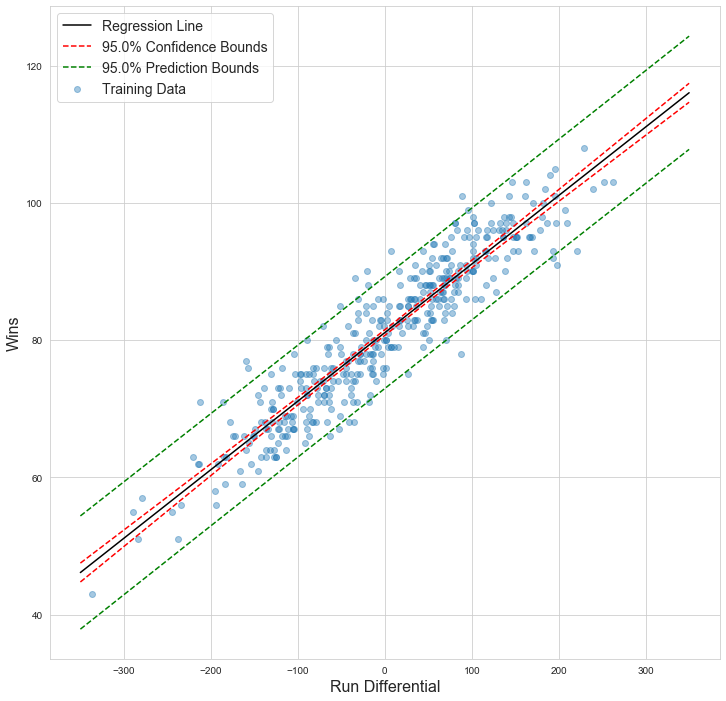

In [10]:
# We can even plot the confidence bounds around our regression line
# Let's try a 99% confidence interval this time

# Make the figure
plt.figure(figsize = (12,12))

# We want a wide array of rd values
xs = np.linspace(-350,350,700)

# Plot the regression line
plt.plot(xs, beta_0_hat+beta_1_hat*xs, 'k', label="Regression Line")

# Now we get the confidence bounds
alpha = 0.05
ci_lbs,ci_ubs = get_ci(baseball_train.RD.values,xs,res,alpha)
pi_lbs,pi_ubs = get_pi(baseball_train.RD.values,xs,res,alpha)

# Plot the bounds
plt.plot(xs, ci_lbs, 'r--', label=str(100*(1-alpha)) + "% Confidence Bounds")
plt.plot(xs, ci_ubs, 'r--')


plt.plot(xs, pi_lbs, 'g--', label=str(100*(1-alpha)) + "% Prediction Bounds")
plt.plot(xs, pi_ubs, 'g--')

plt.scatter(baseball_train.RD,baseball_train.W,alpha = .4,label="Training Data")


# Add labels
plt.xlabel("Run Differential", fontsize=16)
plt.ylabel("Wins", fontsize=16)

# add a legend
plt.legend(fontsize=14)

plt.show()

## Applied Questions

##### 1. Origins of Regression to the Mean.

From Wikipedia:

<q><i>
    The concept of regression comes from genetics and was popularized by Sir Francis Galton during the late 19th century with the publication of Regression towards mediocrity in hereditary stature. Galton observed that extreme characteristics (e.g., height) in parents are not passed on completely to their offspring. Rather, the characteristics in the offspring regress towards a mediocre point (a point which has since been identified as the mean). By measuring the heights of hundreds of people, he was able to quantify regression to the mean, and estimate the size of the effect. Galton wrote that, "the average regression of the offspring is a constant fraction of their respective mid-parental deviations". This means that the difference between a child and its parents for some characteristic is proportional to its parents' deviation from typical people in the population. If its parents are each two inches taller than the averages for men and women, then, on average, the offspring will be shorter than its parents by some factor (which, today, we would call one minus the regression coefficient) times two inches. For height, Galton estimated this coefficient to be about 2/3: the height of an individual will measure around a midpoint that is two thirds of the parents' deviation from the population average. 
    </i></q>

Load in the data set `galton.csv`.

Create two subsets called `male` and `female`. 

For the `male` data regress height on the father's height, for the female data regress height on the mother's height.

Check the linear regression assumptions in the case of the `male` model.

Perform a hypothesis test to check for evidence of a linear relationship between father height and son height.

Interpret your output. Does what you find follow from the wikipedia entry?

Create prediction intervals around both of the regression lines. Use $\alpha = 0.05$.

In [11]:
# Read in the data
galton = pd.read_csv("galton.csv")

# subset the data
male = galton.loc[galton.sex == 'M',].copy()
female = galton.loc[galton.sex == 'F',].copy()

# Note that I am not making a predictive model so I'm
# not going to make a train and a test set.

In [12]:
# I'll use sklearn because it is quicker
from sklearn.linear_model import LinearRegression

In [13]:
# Regression for the female data
slr = LinearRegression(copy_X = True)

slr.fit(female.mother.values.reshape(-1,1), female.height.values.ravel())

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

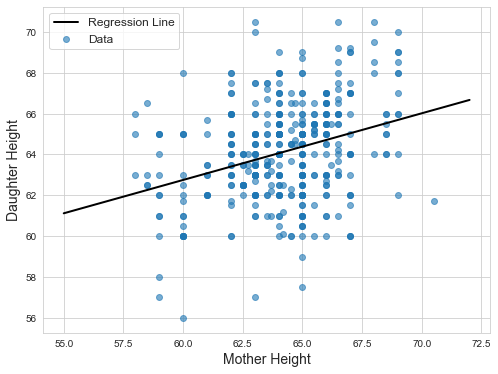

In [14]:
# Plot the line
plt.figure(figsize=(8,6))

xs = np.linspace(55,72,20)
line = slr.predict(xs.reshape(-1,1))

plt.scatter(female.mother, female.height, alpha = .6, label = "Data")
plt.plot(xs, line,'k', linewidth = 2, label ="Regression Line")

plt.xlabel("Mother Height", fontsize=14)
plt.ylabel("Daughter Height", fontsize=14)

plt.legend(fontsize=12)


plt.show()

In [15]:
# Regression for the male data
slr = LinearRegression(copy_X = True)

slr.fit(male.father.values.reshape(-1,1), male.height.values.ravel())

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

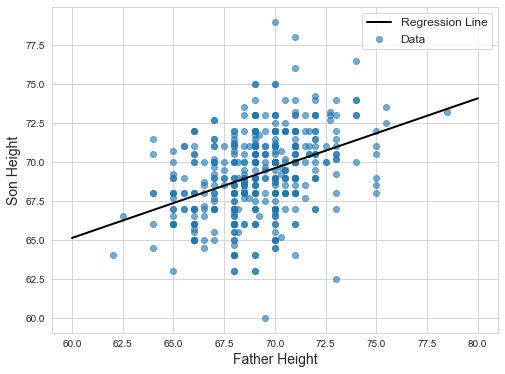

In [16]:
# Plot the line
plt.figure(figsize=(8,6))

xs = np.linspace(60,80,20)
pred = slr.predict(xs.reshape(-1,1))

plt.scatter(male.father, male.height, alpha = .6, label = "Data")
plt.plot(xs, pred,'k', linewidth = 2, label ="Regression Line")

plt.xlabel("Father Height", fontsize=14)
plt.ylabel("Son Height", fontsize=14)

plt.legend(fontsize=12)


plt.show()

In [17]:
# Get the predicted values and residuals for the male data
pred = slr.predict(male.father.values.reshape(-1,1))
res = male.height.values - pred

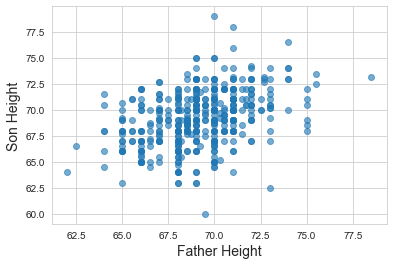

The Pearson correlation coefficient is 0.3913


In [18]:
# Checking the linearity assumption
plt.scatter(male.father, male.height, alpha = .6, label = "Data")

plt.xlabel("Father Height", fontsize=14)
plt.ylabel("Son Height", fontsize=14)



plt.show()

print("The Pearson correlation coefficient is",
         np.round(np.corrcoef(male.father,male.height)[0,1],4))

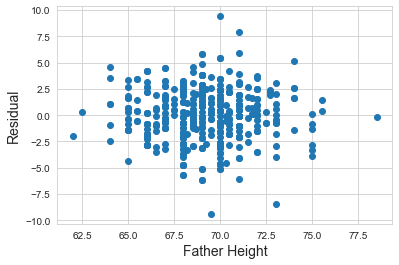

In [19]:
# Check for independence
plt.scatter(male.father, res)

plt.xlabel("Father Height", fontsize=14)
plt.ylabel("Residual", fontsize=14)

plt.show()

# Looks good!

In [20]:
# This package allows us to make a q-q plot
import statsmodels.api as sm 

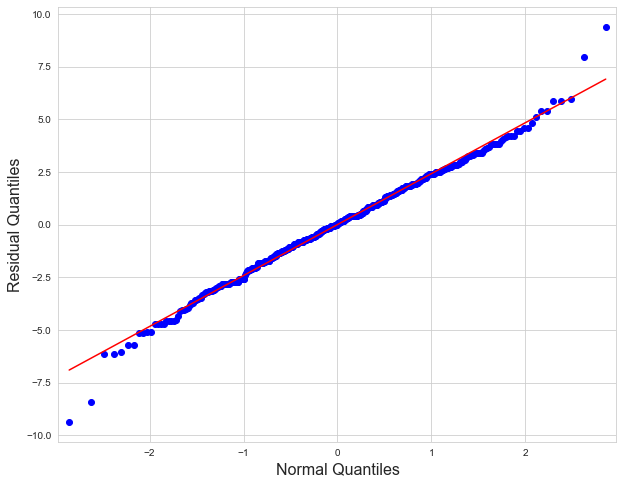

In [21]:
# Check for normality
fig,ax = plt.subplots(figsize=(10,8))

# qqplot makes the qqplot
# put in the data you want to plot
# line = 's' plots a line fit to our data
# ax=ax allows us to put the data on the plt subplot object I made
sm.qqplot(res,line='s',ax=ax) 

# Normals go on the x-axis
plt.xlabel("Normal Quantiles", fontsize=16)

# Residuals on the y-axis
plt.ylabel("Residual Quantiles", fontsize=16)


plt.show() 
# Looks good!

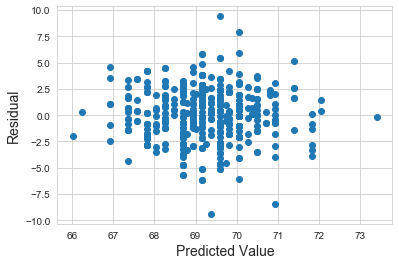

In [22]:
# Check for independence
plt.scatter(pred, res)

plt.xlabel("Predicted Value", fontsize=14)
plt.ylabel("Residual", fontsize=14)

plt.show()

# Looks good!

In [23]:
fit = sm.OLS(male.height,sm.add_constant(male.father),).fit()

# fit.summary makes a snazy table for us to look at
print(fit.summary())
print(beta_1_hat)

                            OLS Regression Results                            
Dep. Variable:                 height   R-squared:                       0.153
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     83.72
Date:                Wed, 30 Sep 2020   Prob (F-statistic):           1.82e-18
Time:                        15:40:11   Log-Likelihood:                -1070.6
No. Observations:                 465   AIC:                             2145.
Df Residuals:                     463   BIC:                             2153.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         38.2589      3.387     11.297      0.0

C:\Users\ywayn\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [24]:
# interpret the coef
print("For every 1 inch increase in father height we",
         "expect a",np.round(slr.coef_[0],4),"increase in son height.")

For every 1 inch increase in father height we expect a 0.4477 increase in son height.


Galton's findings suggest that a child's height is likely to regress to the population mean. This means that a short father would likely have a son taller than them and a tall father would likely have a son shorter than them.

Our coefficient estimates that a 1 inch increase in father height corresponds to a .4477 increase in son height. This agrees with Galton's counterintuitive result. While we would expect a tall father to have a taller son (when compared to a short father) we don't estimate inch for inch gains.

In [25]:
def get_pi(X, X_star, res, alpha, slr):
    # Get n
    n = len(res)

    # The first square root we'll denote root_1
    # remember our residuals were stored in res
    root_1 = np.sqrt(np.sum(np.power(res,2))/(n-2))
    
    # This is the second square root, we'll call it root_2
    root_2 = np.sqrt(1 + (1/n) + np.power((X_star-np.mean(X)),2)/((n-1)*np.var(X)))
    
    # get t_stat
    # this is done using t.ppf 1-alpha goes first then the df
    t_stat = t.ppf(1-alpha/2, n-2)
    
    # Now we calculate y_hat
    y_hat = slr.intercept_ + slr.coef_[0]*X_star
    
    # Now put it all together
    lb = y_hat - t_stat*root_1*root_2
    ub = y_hat + t_stat*root_1*root_2
    
    return lb,ub

##### Confidence Interval
def get_ci(X, X_star, res, alpha,slr):
    # Get n
    n = len(res)

    # The first square root we'll denote root_1
    # remember our residuals were stored in res
    root_1 = np.sqrt(np.sum(np.power(res,2))/(n-2))
    
    # This is the second square root, we'll call it root_2
    root_2 = np.sqrt((1/n) + np.power((X_star-np.mean(X)),2)/((n-1)*np.var(X)))
    
    # get t_stat
    # this is done using t.ppf 1-alpha goes first then the df
    t_stat = t.ppf(1-alpha/2, n-2)
    
    # Now we calculate y_hat
    y_hat = slr.intercept_ + slr.coef_[0]*X_star
    
    # Now put it all together
    lb = y_hat - t_stat*root_1*root_2
    ub = y_hat + t_stat*root_1*root_2
    
    return lb,ub

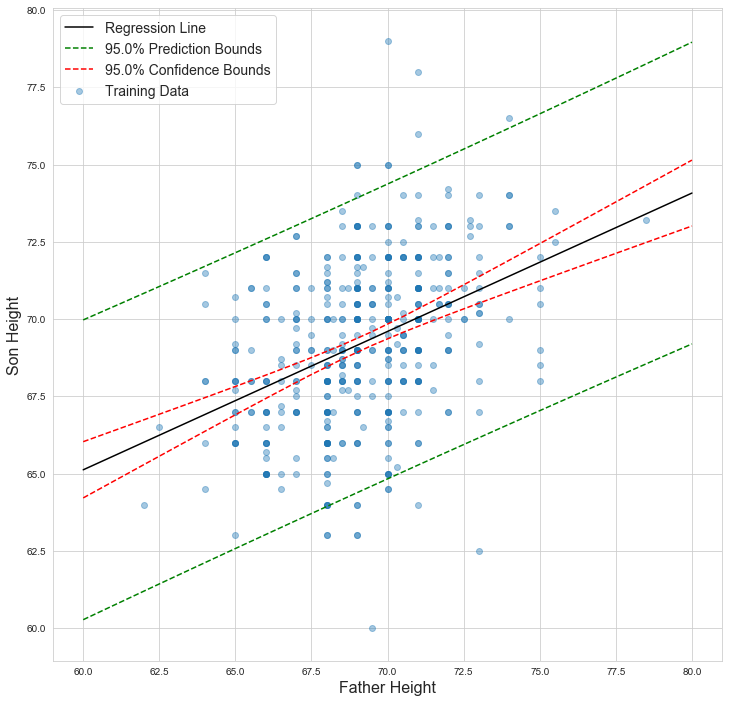

In [26]:
# We can even plot the confidence bounds around our regression line
# Let's try a 99% confidence interval this time

# Make the figure
plt.figure(figsize = (12,12))

# We want a wide array of rd values
xs = np.linspace(60,80,20)

# Plot the regression line
plt.plot(xs, slr.predict(xs.reshape(-1,1)), 'k', label="Regression Line")

# Now we get the confidence bounds
alpha = 0.05
pi_lbs,pi_ubs = get_pi(male.father.values,xs,res,alpha,slr)
ci_lbs,ci_ubs = get_ci(male.father.values,xs,res,alpha,slr)


plt.plot(xs, pi_lbs, 'g--', label=str(100*(1-alpha)) + "% Prediction Bounds")
plt.plot(xs, pi_ubs, 'g--')

plt.plot(xs, ci_lbs, 'r--', label=str(100*(1-alpha)) + "% Confidence Bounds")
plt.plot(xs, ci_ubs, 'r--')

plt.scatter(male.father,male.height,alpha = .4,label="Training Data")


# Add labels
plt.xlabel("Father Height", fontsize=16)
plt.ylabel("Son Height", fontsize=16)

# add a legend
plt.legend(fontsize=14)

plt.show()

##### 2. Let's do that Hockey

Predicting what teams will do well is a pretty common goal in sports. A common approach is to assume that the hot team will just keep winning (for basketball shooting this is called the <a href="https://en.wikipedia.org/wiki/Hot_hand">hot hand fallacy</a>). While a win may be an indicator of a team's overall skill level, there are some sports where a win is more an indicator of luck, see this Youtube video <a href="https://www.youtube.com/watch?v=HNlgISa9Giw&t=123s">https://www.youtube.com/watch?v=HNlgISa9Giw&t=123s</a>. An example of a more luck based sport is <a href="https://www.wired.com/2012/11/luck-and-skill-untangled-qa-with-michael-mauboussin/">hockey</a>. We'll examine winning trends in hockey in this problem.

Load in the data from `hockey.csv`. This data contains the total wins from the first half of the season and the total wins from the second half of the season for each NHL team from 2016-2019. You'll look at this in both the explanatory and predictive sense.

Hold out the 2019 season as a test set.

Using the training data, plot `second_half_wins` against `first_half_wins`. Does there appear to be a linear relationship? Build an SLR model regressing `second_half_wins` on `first_half_wins`. What is the estimate of the slope? Plot the estimated line over the training data, also include the line $y=x$ for comparison. Calculate the Root Mean Square Error on both the training and test data.

In [27]:
## Code here or write here
hockey = pd.read_csv("hockey.csv")

hockey_train = hockey.loc[hockey.season != 2019,].copy()
hockey_test = hockey.drop(hockey_train.index).copy()

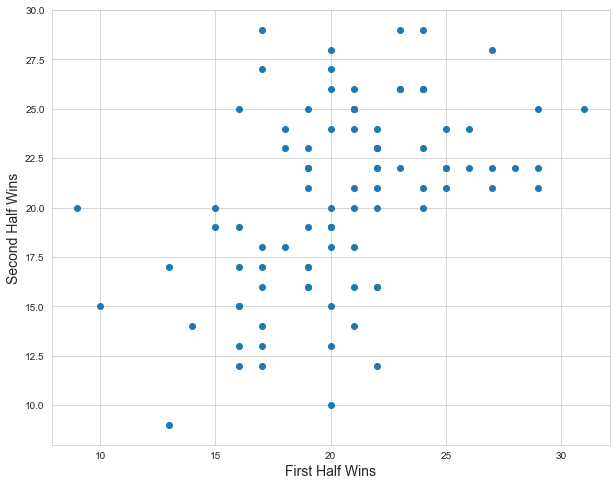

The correlation coefficient is 0.4534


In [28]:
## Code here or write here
plt.figure(figsize=(10,8))

plt.scatter(hockey_train.first_half_wins, hockey_train.second_half_wins)


plt.xlabel("First Half Wins", fontsize=14)
plt.ylabel("Second Half Wins", fontsize=14)

plt.show()

print("The correlation coefficient is",
      np.round(np.corrcoef(hockey_train.first_half_wins, hockey_train.second_half_wins)[0,1],4))

There seems to be a slight positive linear relationship between first half wins and second half wins.

In [29]:
## Code here or write here
slr = LinearRegression(copy_X = True)

slr.fit(hockey_train.first_half_wins.values.reshape(-1,1),
           hockey_train.second_half_wins.values.ravel())

print("We estimate that for every additional first half season win",
         "the team will have",np.round(slr.coef_[0],6),
          "additional second half season wins.")

We estimate that for every additional first half season win the team will have 0.516447 additional second half season wins.


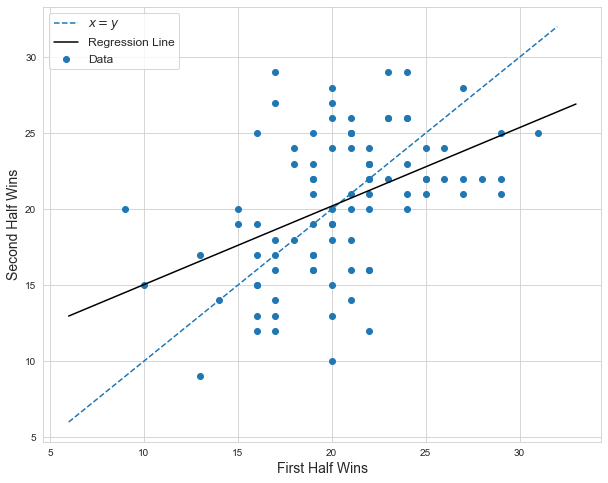

In [30]:
## Code here or write here
plt.figure(figsize=(10,8))

plt.scatter(hockey_train.first_half_wins, hockey_train.second_half_wins, label = "Data")

plt.plot(range(6,33),range(6,33),'--',label="$x=y$")
plt.plot(np.linspace(6,33,10), 
         slr.predict(np.linspace(6,33,10).reshape(-1,1)),'k-',label = "Regression Line")


plt.xlabel("First Half Wins", fontsize=14)
plt.ylabel("Second Half Wins", fontsize=14)
plt.legend(fontsize=12)

plt.show()

In [31]:
train_pred = slr.predict(hockey_train.first_half_wins.values.reshape(-1,1))
train_res = hockey_train.second_half_wins.values - train_pred

train_rmse = np.sqrt(np.sum(np.power(train_res,2))/len(train_res))

test_pred = slr.predict(hockey_test.first_half_wins.values.reshape(-1,1))
test_res = hockey_test.second_half_wins.values - test_pred

test_rmse = np.sqrt(np.sum(np.power(test_res,2))/len(test_res))

print("The training rmse is", np.round(train_rmse,2))
print("The test rmse is",np.round(test_rmse,2))

The training rmse is 4.15
The test rmse is 4.0


Examining the article and video I linked to above, basketball is supposed to be more skill based than hockey. Let's explore that!

Load in the data from `basketball.csv`. This data contains the total wins from the first half of the season and the total wins from the second half of the season for each NBA team from 2016-2019. Repeat the steps for the NHL data above, but on the NBA data.

Compare and contrast your findings. Which line had the higher slope? Which model had better root mse? Make a plot of that contains the regression lines and the line $y=x$, what do you notice?

In [32]:
## Code here or write here
basketball = pd.read_csv("basketball.csv")

basketball_train = basketball.loc[basketball.season != 2019,].copy()
basketball_test = basketball.drop(basketball_train.index).copy()

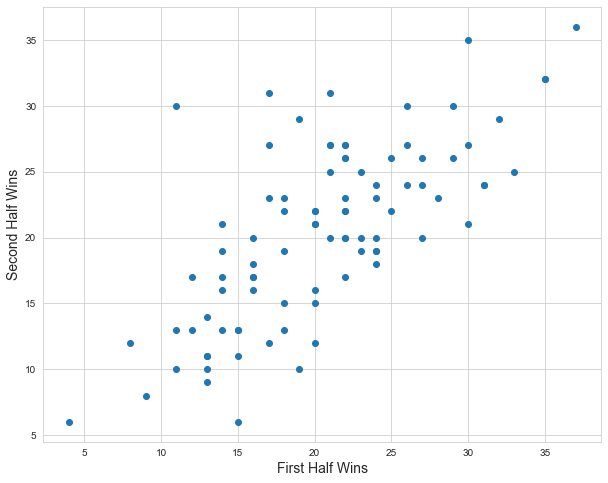

The correlation coefficient is 0.7147


In [33]:
## Code here or write here
plt.figure(figsize=(10,8))

plt.scatter(basketball_train.first_half_wins, basketball_train.second_half_wins)


plt.xlabel("First Half Wins", fontsize=14)
plt.ylabel("Second Half Wins", fontsize=14)

plt.show()

print("The correlation coefficient is",
      np.round(np.corrcoef(basketball_train.first_half_wins, basketball_train.second_half_wins)[0,1],4))

In [34]:
## Code here or write here
bball_slr = LinearRegression(copy_X = True)

bball_slr.fit(basketball_train.first_half_wins.values.reshape(-1,1),
           basketball_train.second_half_wins.values.ravel())

print("We estimate that for every additional first half season win",
         "the team will have",np.round(bball_slr.coef_[0],6),
          "additional second half season wins.")

We estimate that for every additional first half season win the team will have 0.738271 additional second half season wins.


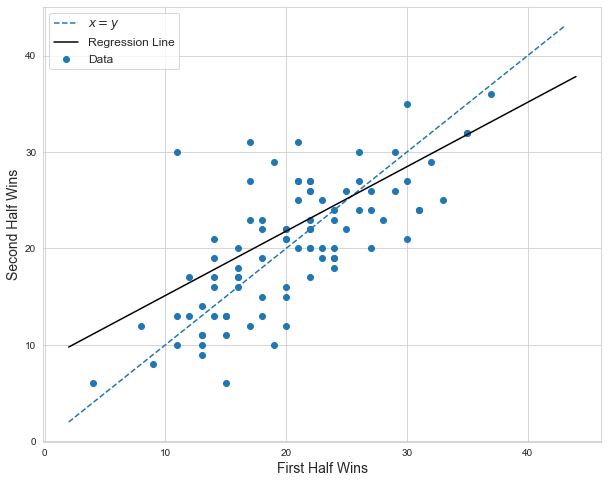

In [35]:
## Code here or write here
plt.figure(figsize=(10,8))

plt.scatter(basketball_train.first_half_wins, basketball_train.second_half_wins, label = "Data")

plt.plot(range(2,44),range(2,44),'--',label="$x=y$")
plt.plot(np.linspace(2,44,10), 
         bball_slr.predict(np.linspace(6,44,10).reshape(-1,1)),'k-',label = "Regression Line")


plt.xlabel("First Half Wins", fontsize=14)
plt.ylabel("Second Half Wins", fontsize=14)
plt.legend(fontsize=12)

plt.show()

In [36]:
bball_train_pred = bball_slr.predict(basketball_train.first_half_wins.values.reshape(-1,1))
bball_train_res = basketball_train.second_half_wins.values - bball_train_pred

bball_train_rmse = np.sqrt(np.sum(np.power(bball_train_res,2))/len(bball_train_res))

bball_test_pred = bball_slr.predict(basketball_test.first_half_wins.values.reshape(-1,1))
bball_test_res = basketball_test.second_half_wins.values - bball_test_pred

bball_test_rmse = np.sqrt(np.sum(np.power(bball_test_res,2))/len(bball_test_res))

print("The training rmse is", np.round(bball_train_rmse,2))
print("The test rmse is",np.round(bball_test_rmse,2))

The training rmse is 4.71
The test rmse is 4.13


Text(0, 0.5, 'Second Half Wins')

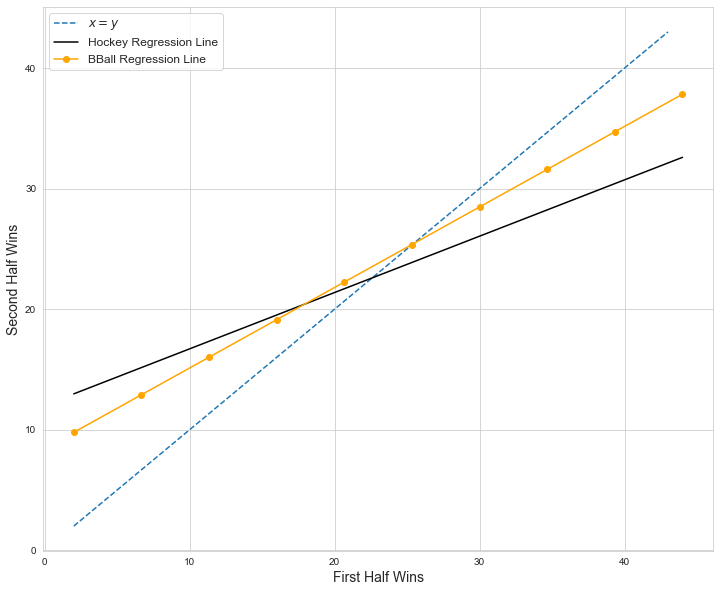

In [37]:
plt.figure(figsize=(12,10))

plt.plot(range(2,44),range(2,44),'--',label="$x=y$")
plt.plot(np.linspace(2,44,10), 
         slr.predict(np.linspace(6,44,10).reshape(-1,1)),'k-',label = "Hockey Regression Line")
plt.plot(np.linspace(2,44,10), 
         bball_slr.predict(np.linspace(6,44,10).reshape(-1,1)),'o-',
         color='orange',label = "BBall Regression Line")

plt.legend(fontsize=12)
plt.xlabel("First Half Wins",fontsize=14)
plt.ylabel("Second Half Wins", fontsize=14)

It appears to be the case that the first half performance is a stronger indicator of second half performance in basketball. This is what we would expect given the findings on "luck vs skill" from the video and article.